# **Projeto Petrobrás**

## Desafio

Desenvolver uma aplicação que seja capaz de
realizar a classificação do ciclo, como sendo:
“normal”, “alerta” ou “anômalo”. Utilizando
como entradas os features “campanha” e/ou
“resistência”.

## **PRÉ-PROCESSAMENTO DOS DADOS**


descrição do dataset:
         Unnamed: 0    campaign_E  resistance_E       cycle_E
count  17268.000000  17268.000000  17268.000000  17268.000000
mean   23111.483264   3344.230495      0.012665     26.856382
std    13372.423051   3252.839529      0.008188     22.383915
min        0.000000      4.544912      0.001649      0.000000
25%    13618.750000    948.270051      0.006139     12.000000
50%    25842.500000   2461.632067      0.008878     15.000000
75%    36547.250000   4528.089014      0.018012     39.000000
max    41017.000000  16741.986596      0.057695     84.000000

Número de valores nulos:
Unnamed: 0      0
campaign_E      0
resistance_E    0
cycle_E         0
target_cycle    0
dtype: int64


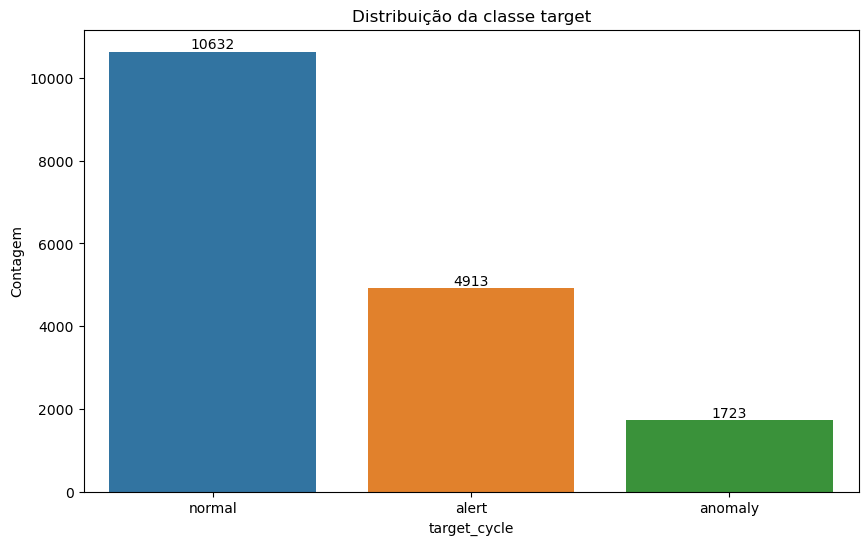

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
dataset_path = './dataset/dataset_carbon_filter.csv'
df = pd.read_csv(dataset_path)

# Informações sobre o dataset
print(f'\ndescrição do dataset:\n{df.describe()}')
print(f'\nNúmero de valores nulos:\n{df.isnull().sum()}')

# Verificar a distribuição da classe target
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target_cycle', data=df)
ax.bar_label(ax.containers[0])
plt.title('Distribuição da classe target')
plt.xlabel('target_cycle')
plt.ylabel('Contagem')
plt.show()

## **TREINAMENTO E PLOT DAS CLASSES**


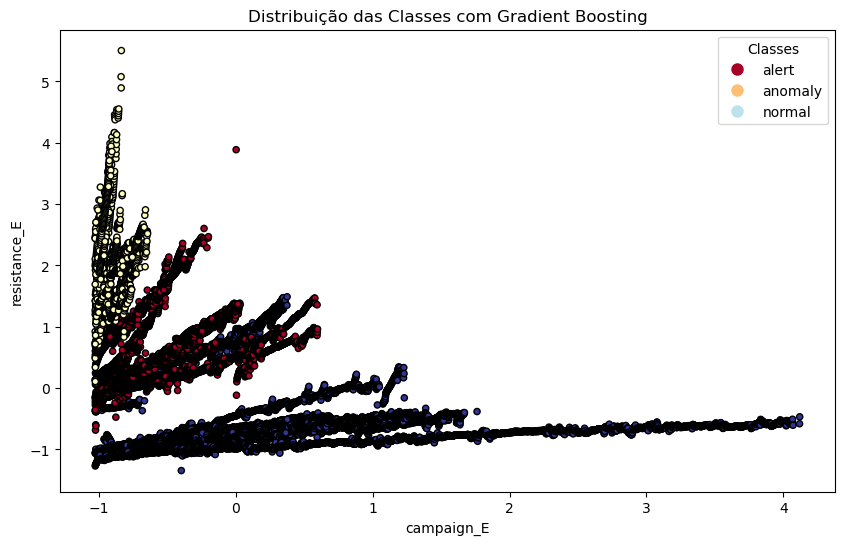

In [43]:
# Seleção das colunas para o Gradient Boosting
X = df[['campaign_E', 'resistance_E']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar os rótulos target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['target_cycle'])

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Configurar e treinar o modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)

# Plotar os dados reais
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=20)

# Criar uma legenda manualmente
class_labels = label_encoder.classes_
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.RdYlBu(i / len(class_labels)), markersize=10, label=label) for i, label in enumerate(class_labels)]
plt.legend(handles=handles, title='Classes')

plt.title('Distribuição das Classes com Gradient Boosting')
plt.xlabel('campaign_E')
plt.ylabel('resistance_E')
plt.show()


## **MATRIZ DE CONFUSÃO, F1-SCORE E CURVA DE APRENDIZADO**


Matriz de Confusão - Dados de Teste


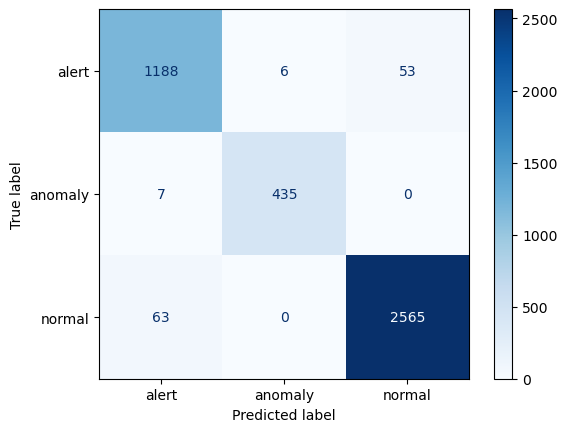

Acurácia: 0.97
Score F1: 0.97

Relatório de Classificação:
              precision    recall  f1-score   support

       alert       0.94      0.95      0.95      1247
     anomaly       0.99      0.98      0.99       442
      normal       0.98      0.98      0.98      2628

    accuracy                           0.97      4317
   macro avg       0.97      0.97      0.97      4317
weighted avg       0.97      0.97      0.97      4317



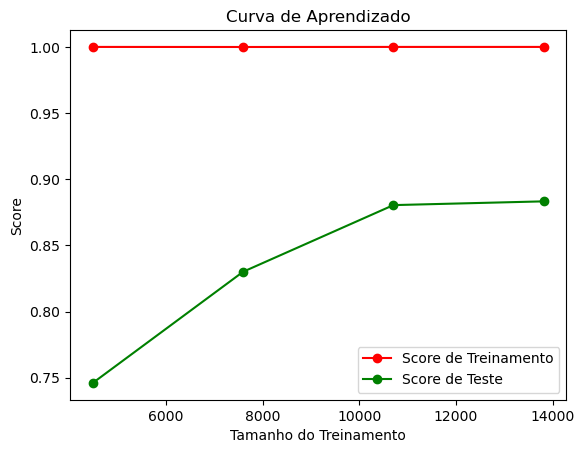

In [42]:
# Previsões e avaliação
y_pred = gb_model.predict(X_test)

# Matriz de Confusão
print("\nMatriz de Confusão - Dados de Teste")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Acurácia e F1 Score
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
print(f'Score F1: {f1_score(y_test, y_pred, average="weighted"):.2f}')
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plotar a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(gb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de Teste")
plt.title('Curva de Aprendizado')
plt.xlabel('Tamanho do Treinamento')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

## **PROBLEMA REAL PARA COMPARAÇÃO**


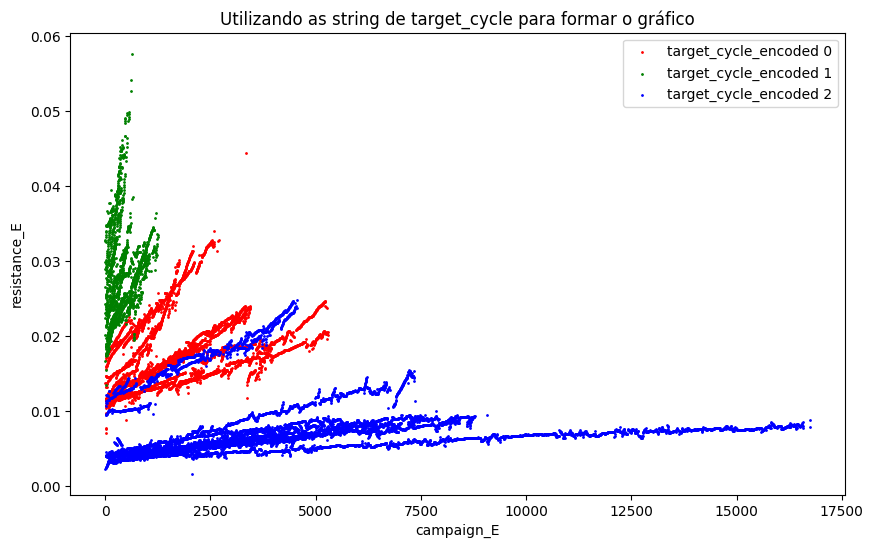

In [9]:
label_encoder = LabelEncoder()
df['target_cycle_encoded'] = label_encoder.fit_transform(df['target_cycle'])

# Plotando os clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i in range(3):
    cluster_data = df[df['target_cycle_encoded'] == i]
    plt.scatter(cluster_data['campaign_E'], cluster_data['resistance_E'], 
                s=1, c=colors[i], label=f'target_cycle_encoded {i}')
    
plt.title('Utilizando as string de target_cycle para formar o gráfico')
plt.xlabel('campaign_E')
plt.ylabel('resistance_E')
plt.legend()
plt.show()
    